In [23]:
from itertools import product
from Bio import SeqIO
import os
import numpy as np
import pandas as pd
from itertools import product
from Bio import SeqIO
import os
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from textwrap import wrap
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import precision_score
import csv
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# data = pd.read_pickle(r"C:\Users\Saranya Sundar\OneDrive\Desktop\Python\IISER Pune Assignments\Bi4164\naivebayes.pickle")
# print(data)

dir_data=r"d:\\github\\Bi4164---Moving-Ahead\\data_set"


os.chdir(dir_data)
fasta_sequences_test = SeqIO.parse(open("test.fa"), 'fasta')

sequences = []
for pop in fasta_sequences_test:
    name, sequence = pop.id, str(pop.seq)
    sequences.append(sequence)

def read_fasta(fasta_sequences_neg, fasta_sequences_pos):
    '''Returns a list of sequences and their corresponding genomic activities i.e., promoter or not
    
        Parameters
        ----------
        fasta_sequences_neg: class 'Bio.SeqIO.FastaIO.FastaIterator'
            The list of sequences that do not show promoter activity
        fasta_sequences_pos: class 'Bio.SeqIO.FastaIO.FastaIterator'
            The list of sequences that show promoter activity
        
        Returns
        -------
        list_of_sequences: list
            The list of combined negative and positive sequences
        list_of_ids: list
            The list of ids, which is whether the corresponding sequence has promoter activity or not'''
    
    list_of_sequences = []
    list_of_ids = []
    for fasta in fasta_sequences_neg:
        name, sequence = fasta.id, str(fasta.seq)
        list_of_sequences.append(sequence)
        list_of_ids.append('neg')
    for fasta in fasta_sequences_pos:
        name, sequence = fasta.id, str(fasta.seq)
        list_of_sequences.append(sequence)
        list_of_ids.append('pos')
    print('read_fasta has run!')
    return list_of_sequences, list_of_ids
def make_kmers(sequence, kmer_size):
    '''Returns the list of kmers for a particular sequence and size of kmer inputted by the user
    
        Parameters
        ----------
        sequence: string
            The sequence for which kmers are to be generated 
        kmer_size: int
            The size of the sliding window to generate kmers of that size
        
        Returns
        -------
        kmers: list
            The list of kmers for the sequence'''

    output= []
    for i in range(kmer_size):
        output+=wrap(sequence[i:], width=kmer_size)
    output= [i for i in output if len(i)==kmer_size]
    dict_output= Counter(output)
    return output, dict_output

def get_vectors_for_all_sequences(sequences_list, kmer_size):
    D = []
    v = DictVectorizer()
    for i in range(0, len(sequences_list)):
        kmers_for_sequence = dict(make_kmers(sequences[i], kmer_size)[1])
        D.append(kmers_for_sequence)
    print('kmers have been made and normalised vectors have been acquired!')
    X = v.fit_transform(D)
    return X, v
        
kmer_size = 6
normalised_vectors_for_all_data = get_vectors_for_all_sequences(sequences, kmer_size)
print(sequences[0])
print(dict(make_kmers(sequences[0], kmer_size)[1]))
Xtest, v_test= get_vectors_for_all_sequences(sequences, kmer_size)

os.chdir(dir_data)
fasta_sequences_neg = SeqIO.parse(open("negative.fa"), 'fasta')
fasta_sequences_pos = SeqIO.parse(open("positive.fa"), 'fasta')
kmer_size = 6
sequences, ids = read_fasta(fasta_sequences_neg, fasta_sequences_pos)
X, v= get_vectors_for_all_sequences(sequences, kmer_size)

clf= BernoulliNB()

# for fold_no in range(0,3):
#     trained_model = data[f'trained_model_for_fold_{fold_no}']
#     prob_testingFA= trained_model.predict_proba(X)[:,1]
#     print(prob_testingFA)

# array = (1 if i > 0.5 else 0 for i in prob_testingFA)
# print(array)
# print(sum(array))

kmers have been made and normalised vectors have been acquired!
TGATGTTAGTACCGCCTACGAATTGTAGGTTATAGTGGGCGTGTTGAGGCTGGAGTACCTGGTACGTGCAATCCACGTG
{'TGATGT': 1, 'TAGTAC': 1, 'CGCCTA': 1, 'CGAATT': 1, 'GTAGGT': 1, 'TATAGT': 1, 'GGGCGT': 1, 'GTTGAG': 1, 'GCTGGA': 1, 'GTACCT': 1, 'GGTACG': 1, 'TGCAAT': 1, 'CCACGT': 1, 'GATGTT': 1, 'AGTACC': 2, 'GCCTAC': 1, 'GAATTG': 1, 'TAGGTT': 1, 'ATAGTG': 1, 'GGCGTG': 1, 'TTGAGG': 1, 'CTGGAG': 1, 'TACCTG': 1, 'GTACGT': 1, 'GCAATC': 1, 'CACGTG': 1, 'ATGTTA': 1, 'GTACCG': 1, 'CCTACG': 1, 'AATTGT': 1, 'AGGTTA': 1, 'TAGTGG': 1, 'GCGTGT': 1, 'TGAGGC': 1, 'TGGAGT': 1, 'ACCTGG': 1, 'TACGTG': 1, 'CAATCC': 1, 'TGTTAG': 1, 'TACCGC': 1, 'CTACGA': 1, 'ATTGTA': 1, 'GGTTAT': 1, 'AGTGGG': 1, 'CGTGTT': 1, 'GAGGCT': 1, 'GGAGTA': 1, 'CCTGGT': 1, 'ACGTGC': 1, 'AATCCA': 1, 'GTTAGT': 1, 'ACCGCC': 1, 'TACGAA': 1, 'TTGTAG': 1, 'GTTATA': 1, 'GTGGGC': 1, 'GTGTTG': 1, 'AGGCTG': 1, 'GAGTAC': 1, 'CTGGTA': 1, 'CGTGCA': 1, 'ATCCAC': 1, 'TTAGTA': 1, 'CCGCCT': 1, 'ACGAAT': 1, 'TGTAGG': 

In [22]:
np.savetxt("linearsvc_prob.txt", pred[:,1])

In [24]:
os.chdir(r"d:\\github\\Bi4164---Moving-Ahead")
with open('neg_matrix.pickle', 'rb') as handle:
    neg_matrix = pickle.load(handle)
with open('pos_matrix.pickle', 'rb') as handle:
    pos_matrix = pickle.load(handle)

In [29]:
def loglikelihood_given_matrix(sequence, order, matrix):
    
    '''Retunrs the likelihood score for the given sequence and an averaged matrix
        
        Parameters
        ----------
        sequence: str
            The input sequence to calculate the likelihood score for
        order: int
            The order of the Markov Model
        matrix: numpy matrix
            The averaged negative or positive matrix used to calculate the likelihood of teh sequence belonging to either of the given matrices
        matrix rows: list
            The list of matrix row labels for given order
             
        Returns
        -------
        score_likelihood: float
            The likelihood of the sequence being derived from matrix'''
            
    sequence_prefix= "$"*(order-1)
    sequence= sequence_prefix+sequence
    nucleotides= ["A", "T", "G", "C"]
    score_loglikelihood=0
    
    if order==0:
        for char_index in range(order,len(sequence)):
            index_col= nucleotides.index(sequence[char_index])
            # print(index_col)
            if matrix[index_col]!=0.0:
                score_loglikelihood+= np.log(matrix[index_col])
    else:  
        keys= matrix.keys()
        for char_index in range(order,len(sequence)):
            index_col= nucleotides.index(sequence[char_index])
            index_row= sequence[char_index-order: char_index]
            if index_row in keys:
                if matrix[index_row][index_col]!=0.0:
                    score_loglikelihood+= np.log(matrix[index_row] [index_col])
            
    return score_loglikelihood

def given_matrix_seqs_likelihood(list_seq, matrix, order):
    likelihoods= []
    for i in list_seq:
        likelihoods.append(loglikelihood_given_matrix(i, order, matrix))
    return np.array(likelihoods)

In [27]:
onehot_ids= [1 if i=="pos" else 0 for i in ids]
y=onehot_ids

In [28]:
from sklearn.model_selection import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s= train_test_split(sequences, y, test_size=0.3, random_state=32)
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=32)

In [ ]:
def create_priors_given_matrix_seqs(x_train_s, neg_matrix, pos_matrix, order=6):
    neg_likelihood= np.array(given_matrix_seqs_likelihood(x_train_s, neg_matrix, order))
    pos_likelihood= np.array(given_matrix_seqs_likelihood(x_train_s, pos_matrix, order))
    score= pos_likelihood- neg_likelihood
    prediction= [1.0 if i>0 else 0.0 for i in score]
    score0= (len(prediction)- sum(prediction))/ len(prediction)
    score1= 1- score0
    prior= [score0, score1]
    return score


In [31]:
create_priors_given_matrix_seqs(x_train_s, neg_matrix, pos_matrix)

[0.5295714285714286, 0.4704285714285714]

In [33]:
clf= BernoulliNB(class_prior=[0.5295714285714286, 0.4704285714285714])
clf.fit(x_train, y_train)

BernoulliNB(class_prior=[0.5295714285714286, 0.4704285714285714])

fold number: 0, precision test: 0.9014190227687029, precision train: 0.9001404516059329
[0.00000000e+00 8.72483221e-04 1.00671141e-03 ... 9.99563758e-01
 1.00000000e+00 1.00000000e+00] [0.         0.13228477 0.15009934 ... 0.99996689 0.99996689 1.        ] [           inf 1.00000000e+00 1.00000000e+00 ... 4.37694120e-16
 1.52416240e-17 1.80094539e-19]


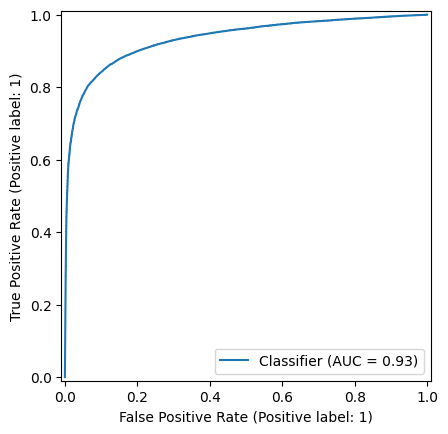

In [35]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt 

y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train) 
print(f"fold number: {0}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
y_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
# roc_auc = metrics.auc(fpr, tpr)

RocCurveDisplay.from_predictions(y_test, y_pred)
# display.plot()
plt.show()